 # Stationary thermal balance of a two-layer corium pool
---

In [24]:
import sympy
import math
pi = math.pi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy
from scipy.optimize import brentq

In [25]:
g = 9.81
Pres=14E6
R=2

## 1. Oxide pool

Set $\rho^{ox},\lambda^{ox},\nu^{ox},Cp^{ox},\beta^{ox},T_{liq}^{ox},H^{ox}$

In [26]:
oxide = {
      "rho":    8191,
      "lambda": 5.3,
      "nu":     5.7E-7,
      "Cp":     533,
      "beta":   1.05E-4,
      "Tliq":   2950,
      "H":      1.5
    }

Calculate $V^{ox}$, $S_{lat}^{ox}$, $S_{up}^{ox}$

>$V^{ox}=\frac{\pi}{3}\left(H^{ox}\right)^2\left(3R-H^{ox}\right)$

>$S_{lat}^{ox}=2\pi R H^{ox}$

>$S_{up}^{ox}=\pi\left(R^2-\left(R-H^{ox}\right)^2\right)$

In [27]:
V_ox = pi/3*oxide["H"]**2*(3*R-oxide["H"])
Slat_ox=2*pi*R*oxide["H"]
Sup_ox=pi*(R**2-(R-oxide["H"])**2)
print('V_ox={0:e}, Slat_ox={1:e}, Sup_ox={2:e}'.format(V_ox, Slat_ox, Sup_ox))

V_ox=1.060288e+01, Slat_ox=1.884956e+01, Sup_ox=1.178097e+01


Calculate $Ra_i^{ox}$

>$q^{ox} = \frac{P_{res}}{V^{ox}}$

>$\alpha^{ox}=\frac{\lambda^{ox}}{\rho^{ox}Cp^{ox}}$

>$Ra_i^{ox}=\frac{g\left(H^{ox}\right)^5q^{ox}\beta^{ox}}{\lambda^{ox}\nu^{ox}\alpha^{ox}}$

In [28]:
q_ox = Pres / V_ox
print('q_ox={0:e}'.format(q_ox))
oxide["alpha"]=oxide["lambda"]/(oxide["rho"]*oxide["Cp"])
Rai_ox=g*oxide["H"]**5*q_ox*oxide["beta"]/(oxide["lambda"]*oxide["nu"]*oxide["alpha"])
print('Rai_ox={0:e}'.format(Rai_ox))

q_ox=1.320397e+06
Rai_ox=2.816155e+15


Calculate $Nu^{ox}_{lat}$ based on "BALI downward" correlation $Nu^{ox}_{lat}=0.131\left(Ra^{ox}\right)^{0.25}\left(\frac{H^{ox}}{R}\right)^{0.19}$

In [29]:
Nulat_ox=0.131*Rai_ox**0.25*(oxide["H"]/R)**0.19
print('Nulat_ox={0:e}'.format(Nulat_ox))

Nulat_ox=9.035393e+02


Calculate $Nu^{ox}_{up}$ based on "BALI upward" correlation $Nu^{ox}_{up}=0.381\left(Ra^{ox}\right)^{0.234}$

In [30]:
Nuup_ox=0.381*Rai_ox**0.234
print('Nuup_ox={0:e}'.format(Nuup_ox))

Nuup_ox=1.570886e+03


Calculate $T^{ox}$

>$T^{ox}=T^{ox}_{liq}+P_{res}\frac{H^{ox}}{\lambda^{ox}}\left(Nu_{lat}^{ox}S_{lat}^{ox}+Nu_{up}^{ox}S_{up}^{ox}\right)^{-1}$

In [31]:
T_ox=oxide["Tliq"]+Pres*oxide["H"]/oxide["lambda"]/(Nulat_ox*Slat_ox+Nuup_ox*Sup_ox)
print('T_ox={0:5.1f}'.format(T_ox))

T_ox=3061.5


Calculate $\phi_{lat}^{ox}$ and $\phi_{up}^{ox}$

>$\phi_{\star}^{ox}=\left(\frac{\lambda^{ox}}{H^{ox}}Nu_{\star}^{ox}\right)\left(T^{ox}-T^{ox}_{liq}\right)$

In [32]:
philat_ox=oxide["lambda"]/oxide["H"]*Nulat_ox*(T_ox-oxide["Tliq"])
phiup_ox=oxide["lambda"]/oxide["H"]*Nuup_ox*(T_ox-oxide["Tliq"])
print('philat_ox={0:e}, phiup_ox={1:e}'.format(philat_ox, phiup_ox))

philat_ox=3.559456e+05, phiup_ox=6.188440e+05


In [33]:
print('power partition lat={0:3.2f}%, up={1:3.2f}%'.format(philat_ox*Slat_ox/Pres*100, phiup_ox*Sup_ox/Pres*100))

power partition lat=47.92%, up=52.08%


# 2. Metallic pool

Set $\rho^{met},\lambda^{met},\nu^{met},Cp^{met},\beta^{met},T_{liq}^{met},H^{met}$

In [34]:
metal = {
      "rho":    6899,
      "lambda": 25,
      "nu":     5.9E-7,
      "Cp":     789.5,
      "beta":   1.11E-4,
      "Tliq":   1600,
      "H":      0.9
    }

Calculate $Pr^{met}$

Give the expression of $Ra^{met}\left[\Delta T\right]$ and evaluate it for $\Delta T=100$K

Shall we expect a turbulent or laminar flow?

>$\alpha^{met}=\frac{\lambda^{met}}{\rho^{met}Cp^{ox}}$

>$Pr^{met}=\frac{\nu^{met}}{\alpha^{met}}$

>$Ra^{met}\left[\Delta T\right]=\frac{g\beta^{met}\left(H^{met}\right)^3 \Delta T}{\nu^{met}\alpha^{met}}$

In [35]:
metal["alpha"]=metal["lambda"]/(metal["rho"]*metal["Cp"])
Pr_met=metal["nu"]/metal["alpha"]
print('Pr_met={0:3.2f}'.format(Pr_met))
RA_met= lambda deltaT: g*metal["beta"]*metal["H"]**3*deltaT/(metal["nu"]*metal["alpha"])
print('Ra_met(100)={0:e}'.format(RA_met(100)))

Pr_met=0.13
Ra_met(100)=2.931337e+10


Calculate $V^{met}$, $S_{lat}^{met}$, $S_{up}^{met}$

In [36]:
V_hem = 2*pi/3*R**2
H_tot = oxide["H"] + metal["H"]
H_cyl = H_tot - R
if (H_cyl>=0):
    V_cyl = pi*R**2*H_cyl
    V_met = V_hem + V_cyl
    Slat_hem = 2*pi*R*(R-oxide["H"])
    Slat_cyl = 2*pi*R*H_cyl
    Slat_met=Slat_hem + Slat_cyl
    Sup_met=pi*R**2
else:
    V_met = pi/3*H_tot**2*(3*R-H_tot)-V_ox
    Slat_met=2*pi*R*metal["H"]
    Sup_met=pi*(R**2-(R-H_tot)**2)
print('V_met={0:e}, Slat_met={1:e}, Sup_met={2:e}'.format(V_met, Slat_met, Sup_met))

V_met=1.340413e+01, Slat_met=1.130973e+01, Sup_met=1.256637e+01


Consider the Globe&Dropkin (resp. turbulent Chawla&Chan) for upward (resp.lateral ) heat transfer

>$Nu^{met}_{up}\left[\Delta T\right]=0.069\left(Pr^{met}\right)^{0.074}\left(Ra^{met}\left[\Delta T\right]\right)^{1/3}$

>$Nu^{met}_{lat}\left[\Delta T\right]=\frac{0.16}{\left(1+\left(\frac{0.492}{Pr^{met}}\right)^{9/16}\right)^{16/27}}\left(Ra^{met}\left[\Delta T\right]\right)^{1/3}$

In [37]:
NUup_met=lambda DeltaT: 0.069*Pr_met**0.074*RA_met(DeltaT)**(1/3)
NUlat_met=lambda DeltaT: 0.16/(1+(0.492/Pr_met)**(9/16))**(16/27)*RA_met(DeltaT)**(1/3)
PHIup_met=lambda DeltaT: metal["lambda"]/metal["H"]*NUup_met(DeltaT)*DeltaT
PHIlat_met=lambda DeltaT: metal["lambda"]/metal["H"]*NUlat_met(DeltaT)*DeltaT

## 2.1 Adiabatic top boundary condition

Consider an adiabatic boundary at the top of the metal layer <i>i.e.</i> $\phi^{BC}_{up}=0$

Calculate $\phi_{lat}^{met}$

>$\phi_{lat}^{met}=\frac{\phi_{up}^{ox}S_{up}^{ox}}{S_{lat}^{met}}$

In [38]:
philat_met=phiup_ox*Sup_ox/Slat_met
print('philat_met={0:e}, phiup_met={1:e}'.format(philat_met, 0.0))

philat_met=6.446291e+05, phiup_met=0.000000e+00


Calculate $T^{met}$

In [39]:
def Dummy(T):
    return philat_met-PHIlat_met(T-metal["Tliq"])
T_met=brentq(Dummy, metal["Tliq"], metal["Tliq"]+1000.0)
print('T_met={0:5.1f}'.format(T_met))

T_met=1694.3


## Radiative top boundary condition

Consider radiative heat transfer at the top boundary under the simple form $\phi^{BC}_{up}\left[T^{met}_{up}\right]=\varepsilon_{up}\sigma\left(\left(T^{met}_{up}\right)^4-\left(T^{BC}\right)^4\right)$ where $\varepsilon_{up}$ is an "effective emissivity"

In [40]:
PHIrad=lambda Ti: emissivity*5.67E-08*(Ti**4-Tsurroundings**4)

Describe the algorithm that you would implement in order to find $\left(T^{met},T_{up}^{met}\right)$ such that

$\left\{\begin{array}{rcl}
S_{up}^{ox}\phi_{lat}^{ox} &=& S_{lat}^{met}\phi_{lat}^{met}\left[T^{met}-T_{liq}^{met}\right]+S_{up}^{met}\phi_{up}^{met}\left[T^{met}-T_{up}^{met}\right] \\
\phi_{up}^{BC}\left[T_{up}^{met}\right] &=& \phi_{up}^{met}\left[T^{met}-T_{up}^{met}\right]
\end{array}\right.$

In [41]:
def MetalPowerBalance():
    def FluxBalanceUp(T,Ti):
        return PHIup_met(T-Ti) - PHIrad(Ti)
    def PowerBalance(T):
        def Dummy1(Ti):
            return FluxBalanceUp(T,Ti)
        Tup=brentq(Dummy1, Tsurroundings, T)
        return phiup_ox*Sup_ox-Sup_met*PHIup_met(T-Tup)-Slat_met*PHIlat_met(T-metal["Tliq"])
    T_met=brentq(PowerBalance, metal["Tliq"], metal["Tliq"]+1000.0)
    def Dummy2(Ti):
        return FluxBalanceUp(T_met,Ti)
    Tup_met=brentq(Dummy2, Tsurroundings, T_met)
    philat_met=PHIlat_met(T_met-metal["Tliq"])
    phiup_met=PHIup_met(T_met-Tup_met)
    return (T_met,Tup_met,philat_met,phiup_met)


In [42]:
Tsurroundings=950
emissivity=0.38
(T_met,Tup_met,philat_met,phiup_met) = MetalPowerBalance()
print('T_met={0:5.1f}, Tup_met={1:5.1f}'.format(T_met,Tup_met))
print('philat_met={0:e}, phiup_met={1:e}'.format(philat_met, phiup_met))
print('power partition lat={0:3.2f}%, up={1:3.2f}%'.format(philat_met*Slat_met/(phiup_ox*Sup_ox)*100, phiup_met*Sup_met/(phiup_ox*Sup_ox)*100))

T_met=1676.9, Tup_met=1639.3
philat_met=4.912621e+05, phiup_met=1.380303e+05
power partition lat=76.21%, up=23.79%


In [43]:
emissivity_narray=np.linspace(0.0, 1.0, num=21)
Tsurroundings_narray=np.linspace(950, metal["Tliq"], num=21)
emissivity_grid,Tsurroundings_grid=np.meshgrid(emissivity_narray,Tsurroundings_narray)
iterator_grid=np.nditer([emissivity_grid,Tsurroundings_grid,None,None,None,None])
with iterator_grid:
    for emissivity,Tsurroundings,T_met_grid,Tup_met_grid,philat_met_grid,phiup_met_grid in iterator_grid:
        #print('emissivity={0:3.2f}, Tsurroundings={1:5.1e}'.format(emissivity,T_met_grid))
        (T_met_grid[...],Tup_met_grid[...],philat_met_grid[...],phiup_met_grid[...]) = MetalPowerBalance()
    T_met_grid=iterator_grid.operands[2]
    Tup_met_grid=iterator_grid.operands[3]
    philat_met_grid=iterator_grid.operands[4]
    phiup_met_grid=iterator_grid.operands[5]

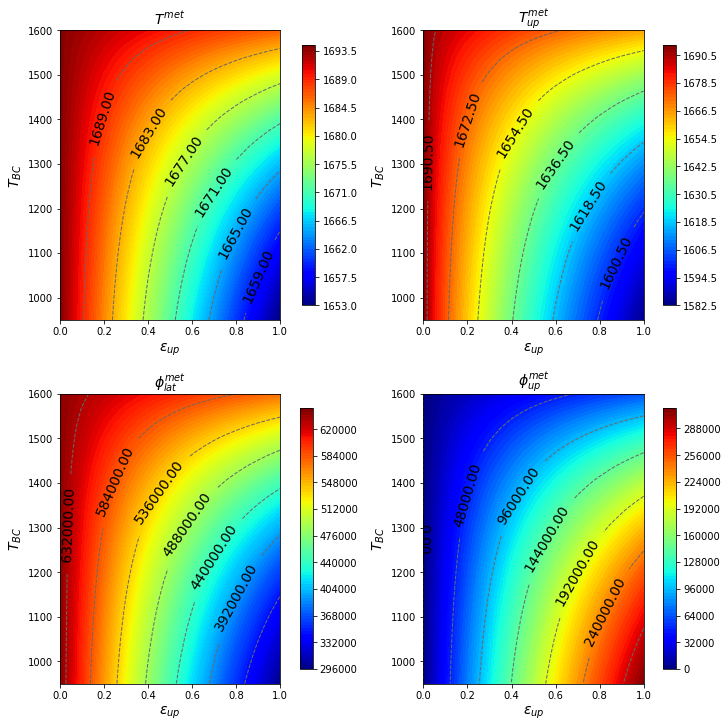

In [44]:
nonadmissible = Tup_met_grid<metal["Tliq"]

def MyContourPlot(ax,x,y,z,xlabel,ylabel,zlabel):
    #z[nonadmissible] = np.nan
    csf = ax.contourf(x,y,z, 100, cmap='jet')
    fig.colorbar(csf, ax=ax, shrink=0.9)
    cs = ax.contour(csf, levels=csf.levels[::12], colors=('dimgray',),linewidths=(1,),linestyles=('dashed',))
    ax.clabel(cs, fmt='%3.2f', colors='k', fontsize=14)
    ax.set_title(zlabel,fontsize=14)
    ax.set_xlabel(xlabel,fontsize=14)
    ax.set_ylabel(ylabel,fontsize=14)
    

plt.rcParams["figure.figsize"] = (10,10)
fig,ax = plt.subplots(2,2,constrained_layout=True)
MyContourPlot(ax[0,0],emissivity_grid,Tsurroundings_grid,T_met_grid,'$\epsilon_{up}$','$T_{BC}$','$T^{met}$')
MyContourPlot(ax[0,1],emissivity_grid,Tsurroundings_grid,Tup_met_grid,'$\epsilon_{up}$','$T_{BC}$','$T^{met}_{up}$')
MyContourPlot(ax[1,0],emissivity_grid,Tsurroundings_grid,philat_met_grid,'$\epsilon_{up}$','$T_{BC}$','$\phi^{met}_{lat}$')
MyContourPlot(ax[1,1],emissivity_grid,Tsurroundings_grid,phiup_met_grid,'$\epsilon_{up}$','$T_{BC}$','$\phi^{met}_{up}$')
plt.show()

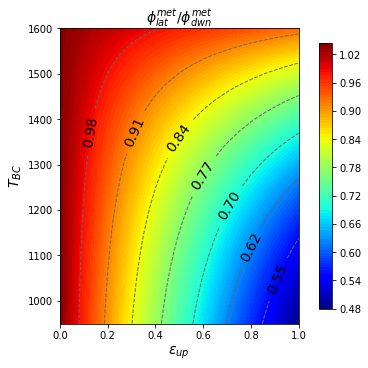

In [45]:
plt.rcParams["figure.figsize"] = (5,5)
fig,ax = plt.subplots(constrained_layout=True)
MyContourPlot(ax,emissivity_grid,Tsurroundings_grid,philat_met_grid/phiup_ox,'$\epsilon_{up}$','$T_{BC}$','$\phi^{met}_{lat}/\phi^{met}_{dwn}$')

In [46]:
!jupyter nbconvert --to script TD.ipynb

[NbConvertApp] Converting notebook TD.ipynb to script
[NbConvertApp] Writing 9669 bytes to TD.py
